In [93]:
from importlib.resources import path
import os
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [94]:
bevölkerung = pd.read_excel(f"Data\\12411-0012_complete.xlsx", index_col=0)

#read sterbefälle pro monat
sterbefälle_woche = pd.read_excel(f"Data\\sonderauswertung-sterbefaelle_groß.xlsx", sheet_name='D_2016_2022_KW_AG_Ins') #Datensatz ist selbst zusammengebaut
sterbefälle_woche = sterbefälle_woche[sterbefälle_woche.columns].replace(["-",".","X "],0)


In [95]:
#Sterbefälle einteilen
#bildet summe aus gruppe 90-95 und gruppe ü 95, ersetzt die 90-95 row damit, benennt sie um und dropt die ü95 reihe.
new_row = (sterbefälle_woche.loc[sterbefälle_woche["Alter"]=="90-95"]) + (sterbefälle_woche.loc[sterbefälle_woche["Alter"]=="95 u. mehr"])
_90_95 = sterbefälle_woche.loc[sterbefälle_woche["Alter"]=="90-95"]
mehr_95 = sterbefälle_woche.loc[sterbefälle_woche["Alter"]=="95 u. mehr"]

new_row = _90_95.iloc[0,3:] + mehr_95.iloc[0,3:]
index_95 = list(_90_95.index)
index_mehr = list(mehr_95.index)

for i in range (len(index_95)):
    new_row = _90_95.iloc[i,3:] +mehr_95.iloc[i,3:]
    sterbefälle_woche.loc[index_95[i], 1:] = new_row
    sterbefälle_woche.drop(index_mehr[i], inplace=True)
    
sterbefälle_woche['Alter'].replace({'90-95': '90<'}, inplace = True)



c:\Users\jungc\Desktop\PMDS\venv\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
c:\Users\jungc\Desktop\PMDS\venv\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
c:\Users\jungc\Desktop\PMDS\venv\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
c:\Users\jungc\Desktop\PMDS\venv\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
 

In [96]:
#alle Altersgruppen einteilen
rows = []
x = 0
j = 0
for k in range (1 ,32): 
    x=0
    for i in range(0, 92):
        k2 = k*91
        if i == 0 and k == 1:
            bevölkerungs_anzahl = bevölkerung.loc[bevölkerung.index[0]]["Gesamt"] #Gesamtbevölkerung je altersgruppe
        if i == 0 and k != 1:
            bevölkerungs_anzahl = bevölkerung.loc[bevölkerung.index[i+(k-1)*92]]["Gesamt"]
        else:
            bevölkerungs_anzahl = bevölkerung.loc[bevölkerung.index[i+((k-1)*92)]]["Gesamt"]

        if ( i < 30):
            x += bevölkerungs_anzahl
            if (i == 29):
                rows.append([1990+k-1,"0 - "+"<{}".format(i+1), x])
                x = 0   

        elif (i >= 30 and  i < 90):
            j += 1
            x += bevölkerungs_anzahl
            if j == 5:
                rows.append([1990+k-1,(str(i-4)+" - <"+str(i+1)), x])
                j = 0
                x = 0

        elif i == 90:
            x += bevölkerungs_anzahl
            rows.append([1990+k-1,"90=<", x])
            x = 0

        elif i == 91:
            x += bevölkerungs_anzahl
            rows.append([1990+k-1,"Gesamt", x])
            x=0
       
        

new_df = pd.DataFrame(rows, columns=["Jahr","Alter", "Anzahl"])




In [97]:

# bevölkerung_16 = new_df.loc[new_df["Jahr"]==2016]

# standard_bevölkerung.loc[standard_bevölkerung.index[14]][2]


# #print(bevölkerung_19)


# bevölkerung_16.loc[bevölkerung_16.index[14]][2]
# x = sterbefälle_monat.loc[(sterbefälle_monat["Jahr"]==2020)]
# y = sterbefälle_monat.loc[(sterbefälle_monat["Jahr"]==2019)]
# z = sterbefälle_monat.loc[(sterbefälle_monat["Jahr"]==2016)]

In [98]:
standard_bevölkerung = new_df.loc[new_df["Jahr"]==2020]

In [99]:
sterberaten_roh = []
sterberaten_bereinigt = []

In [100]:
#rohe sterberate
#loop über jahre
for n in range(0,21):
    z = sterbefälle_woche.loc[(sterbefälle_woche["Jahr"]==2020-n)]
    sterberate_woche = 0
    sterberate_jahr = 0
    gesamt_bev = standard_bevölkerung.loc[standard_bevölkerung.index[14]][2]

    #loop über wochen
    for j in range (1, 54):
        sum = 0
        #loop über altersgruppen
        for i in range(0,14):
            mri = ((z.loc[z.index[i+1]][j]) / gesamt_bev) * 100000  #sterberate je altersgruppe
            sterberate_woche += mri 
    
        sterberate_jahr += sterberate_woche
        sterberate_woche = 0
    #print(2020-n, "Roh:", sterberate_jahr)
    sterberaten_roh.append([2020-n, sterberate_jahr])

In [101]:
#altersbereinigt
#loop über jahre
for n in range(0,21):
    z = sterbefälle_woche.loc[(sterbefälle_woche["Jahr"]==2020-n)]
    q = new_df.loc[new_df["Jahr"]==2020-n]
    erg_sum = 0
    gesamt_bev = standard_bevölkerung.loc[standard_bevölkerung.index[14]][2]

    #loop über wochen
    for j in range (1, 54):
        sum = 0
        #loop über Altersgruppen
        for i in range(0,14):

            asx = standard_bevölkerung.loc[standard_bevölkerung.index[i]][2] #bevölkerung je altersgruppe Standardbevölkerung
            bevölkerung_grp = q.loc[q.index[i]][2] #größe Bevölkerungsruppe untersuchte Bevölkerung
            subx = ((z.loc[z.index[i+1]][j]) / bevölkerung_grp) * 100000 #sterberate je altersgruppe
            
            sum += (asx * subx)    
            

        erg = sum / gesamt_bev
        erg_sum += erg

    #print(2020-n, "Altersbereinigt:",erg_sum)
    sterberaten_bereinigt.append([2020-n, erg_sum])

In [102]:
sterberaten_roh = pd.DataFrame(sterberaten_roh, columns=["Jahr", "Sterberate"])
sterberaten_bereinigt = pd.DataFrame(sterberaten_bereinigt, columns=["Jahr", "Sterberate"])
#print(sterberaten_bereinigt)
#print(sterberaten_roh)

In [103]:
xticks = []
for i in range(2000,2021):
    xticks.append(i)



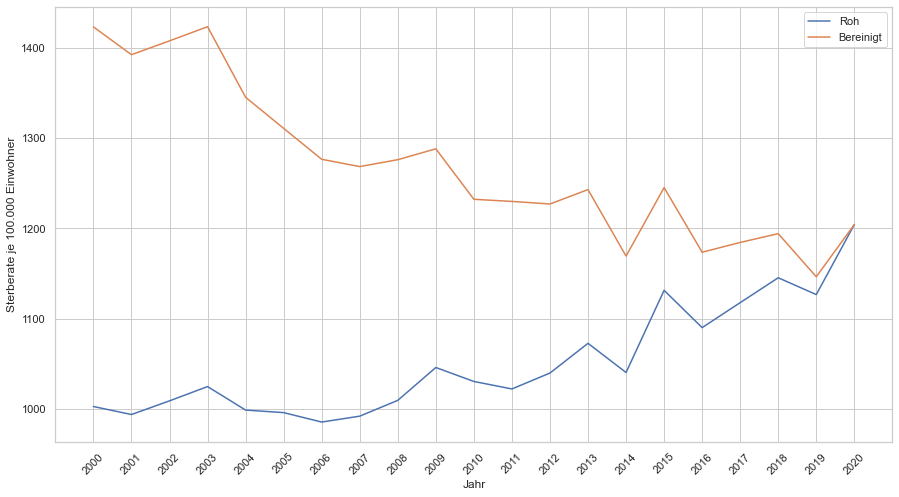

In [104]:
ax = sns.lineplot(x="Jahr",  y='Sterberate', data=sterberaten_roh)
sns.lineplot(ax=ax, x="Jahr",  y='Sterberate', data=sterberaten_bereinigt)
plt.legend(labels=['Roh','Bereinigt'])
sns.set_theme(style="whitegrid")
plt.xticks(rotation=45)

plt.xticks(range(min(xticks), max(xticks)+1, 1))
plt.ylabel("Sterberate je 100.000 Einwohner")
#plt.xticks(df_grippe_w.index, df_grippe_w["Alter"], rotation=45)
#plt.axis([0, 14, 0, 5000])
plt.gcf().set_size_inches(15, 8)